# Data Analysis Project with Adult Income Dataset
> Tasks:

- Descriptive Analysis
- Data Cleaning
- Exploratory Analysis



# Overview

Hi, this is Rabiya Kulsum. For today's quick demo I have chosen an interesting Data set of Adult income. I will be sharing my experience in exploring different analytics and plotting options for this data.

## About U.S. Adult Income Dataset

**Abstract**: The dataset has been taken from Kaggle and is based on US census.

It has 15 columns or features, as shown below:  

1. `age`: numerical
2. `workclass`: categorical
3. `fnlwgt`: numerical
4. `education`: categorical
5. `education-num`: numerical
6. `marital-status`: categorical
7. `occupation`: categorical
8. `relationship`: categorical
9. `race`: categorical
10. `sex`: categorical
11. `capital-gain`: numerical
12. `capital-loss`: numerical
13. `hours-per-week`: numerical
14. `native-country`: categorical
15. `income`: categorical. Classification label which indicates whether a person earns >50k, or <=50k

This dataset is openly accessable, either visit: [UCI(University of California, Irvine) Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult), or [Kaggle Adult Dataset](https://www.kaggle.com/wenruliu/adult-income-dataset).

# Typical Data Science workflow

Before we get our hand dirty, let's understand our workflow so that we can follow the steps, normally when we receive a Data Science job, no matter is from which sector, it could be Financial, consumer, computer network, manufacturing, we need to have a proper understanding of the problem we are going to solve. An article from [Towardsdatascience](https://towardsdatascience.com/the-data-science-workflow-43859db0415) has a very good explaination:

![](https://github.com/JL1829/johnny-ds-blog/blob/master/_notebooks/my_icons/datascienceworkflow.png?raw=true)

Most of the project will fall into the following steps:

* **Understand the Business Problem**:
    * For this example, the problem is to predict whether a person's income exceeds `US$50,000.00` based on the various features. A commercial application of this is to predict if a person will place order particular products based on his/her browsing behavior

* **Descriptive Analysis**:
  * Summarize and describe the key features of the dataset, such as, number of columns, number of entries, mean, median, mode, standard deviation, and range of values. They are often used to provide a quick overview of a dataset or to compare different datasets.

* **Data Cleaning**:
    * Following the previous step, we identify any outliers and clean the data by removing any duplicates or missing values.

* **EDA(Exploratory Data Analysis)**:
  * This is one of the more time consuming step, which involves in-depth examination of the data to identify patterns, relationships, and other insights that may not be immediately apparent. This involves a variety of techniques, including data visualization and feature correlation between labels.



# 1. Descriptive Analysis

Let's download the adult census dataset from [Kaggle Site](https://www.kaggle.com/wenruliu/adult-income-dataset).


## Data frame
As seen below, the dataset consists of 15 columns (0-14) and 32,561 entries. Some of the columns are of integer type, and some of the columns have null/empty values since the count of non-null is less than the total number of entries (32,561).

In [ ]:
# import
import numpy as np
import pandas as pd


# load dataset
raw_df = pd.read_csv('/content/adult.csv', na_values='?')

# Describe the entire dataset
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


## View data
Let us now sample 5 rows from the dataset

In [ ]:
# Peek at the first 5 rows
print(raw_df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

## Summarize data
We can describe the key features of data set, such as mean, median, and standard deviation

It is important to note that in the dataset, the maximum values for `capital.gain` and `hours.per.week` are 99999 and 99 respectively. These values are unusually high and may be indicative of incorrect data or a refusal to provide accurate information.

In [ ]:
# checking the outliers
print(raw_df.describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


# 2. Data Cleaning

In this step, we clean up our dataset by identifying and removing empty values

## 2.1.1 Identify null values

Let us check the percentage of null values in each column.
As seen below, the following columns contain null values:
* workclass
* occupation
* native.country

In [ ]:
# Calculate percentage of null values in each column
null_percent = raw_df.isnull().sum() / len(raw_df) * 100

# Print the percentage of null values for each column
print(null_percent)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64


## 2.1.2 Fill missing values


We can either throw these rows away, which could lead to loss of data, or fill the missing values using a strategy. For example, we can replace null values use the [mode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html) method. For columns of `categorical` type, this strategy would choose the most-frquent value, and for columns of `numerical` data type, their `median` value would be chosen.

In [ ]:
cleaned_df = raw_df.fillna(raw_df.mode().iloc[0])

print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


## 2.2.1 Identify outliers

As mentioned in the previous descriptive analysis section, the maximum values for `capital.gain` and `hours.per.week` are 99999 and 99 respectively. These values are unusually high and may be indicative of incorrect data or a refusal to provide accurate information.

In [ ]:
# checking the outliers
print(cleaned_df.describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


## 2.2.2 Remove outliers

We can replace the outliers in `capital.gain` and `hours.per.week` with their mean values, similar to the missing value case

In [ ]:
# check the quantity of this outlier
capital_gain_outliers = (cleaned_df['capital.gain'] == 99999).sum()
print(f"Capital gain outliers : {capital_gain_outliers}")

hours_per_week_outliers = (cleaned_df['hours.per.week'] == 99).sum()
print(f"Hours per week outliers : {hours_per_week_outliers}")

Capital gain outliers : 0
Hours per week outliers : 85


In [ ]:
# replace it with mean value
capital_gain_mean = np.mean(cleaned_df['capital.gain'].values)
hours_per_week_mean = np.mean(cleaned_df['hours.per.week'].values)

cleaned_df['capital.gain'].replace(99999, capital_gain_mean, inplace=True)
cleaned_df['hours-per-week'] = cleaned_df['hours.per.week'].replace(99, hours_per_week_mean)
print(cleaned_df.describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679    594.601799     87.303830   
std       13.640433  1.055500e+05       2.572720   2554.224665    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  41310.000000   4356.000000   

       hours.per.week  hours-per-week  
count    32561.000000    32561.000000  
mean        40.437456       40.284579  
std         12.347429       11.978418  
min          1.000000        1.000000  
25%         40.000000       40.000000  
50%         40.000000       40.000000  

After the data exploration and cleaning, we save the cleaned DataFrame to `cleaned_df` variable

# 3. Exploratory Analysis

## 3.1 Income split

Let us view the split up of dataset based on income.

As seen below, more than 75% of the entries have less than $50K income per annum

In [ ]:
income_split = cleaned_df['income'].value_counts(normalize=True) * 100
print(f"Income split: \n{income_split}")

Income split: 
<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64


## 3.2 Visualize relationship of features

Finally, we will plot the histogram distribution of key columns, grouped by their income field.
As seen from the graph below, the following fields have a high

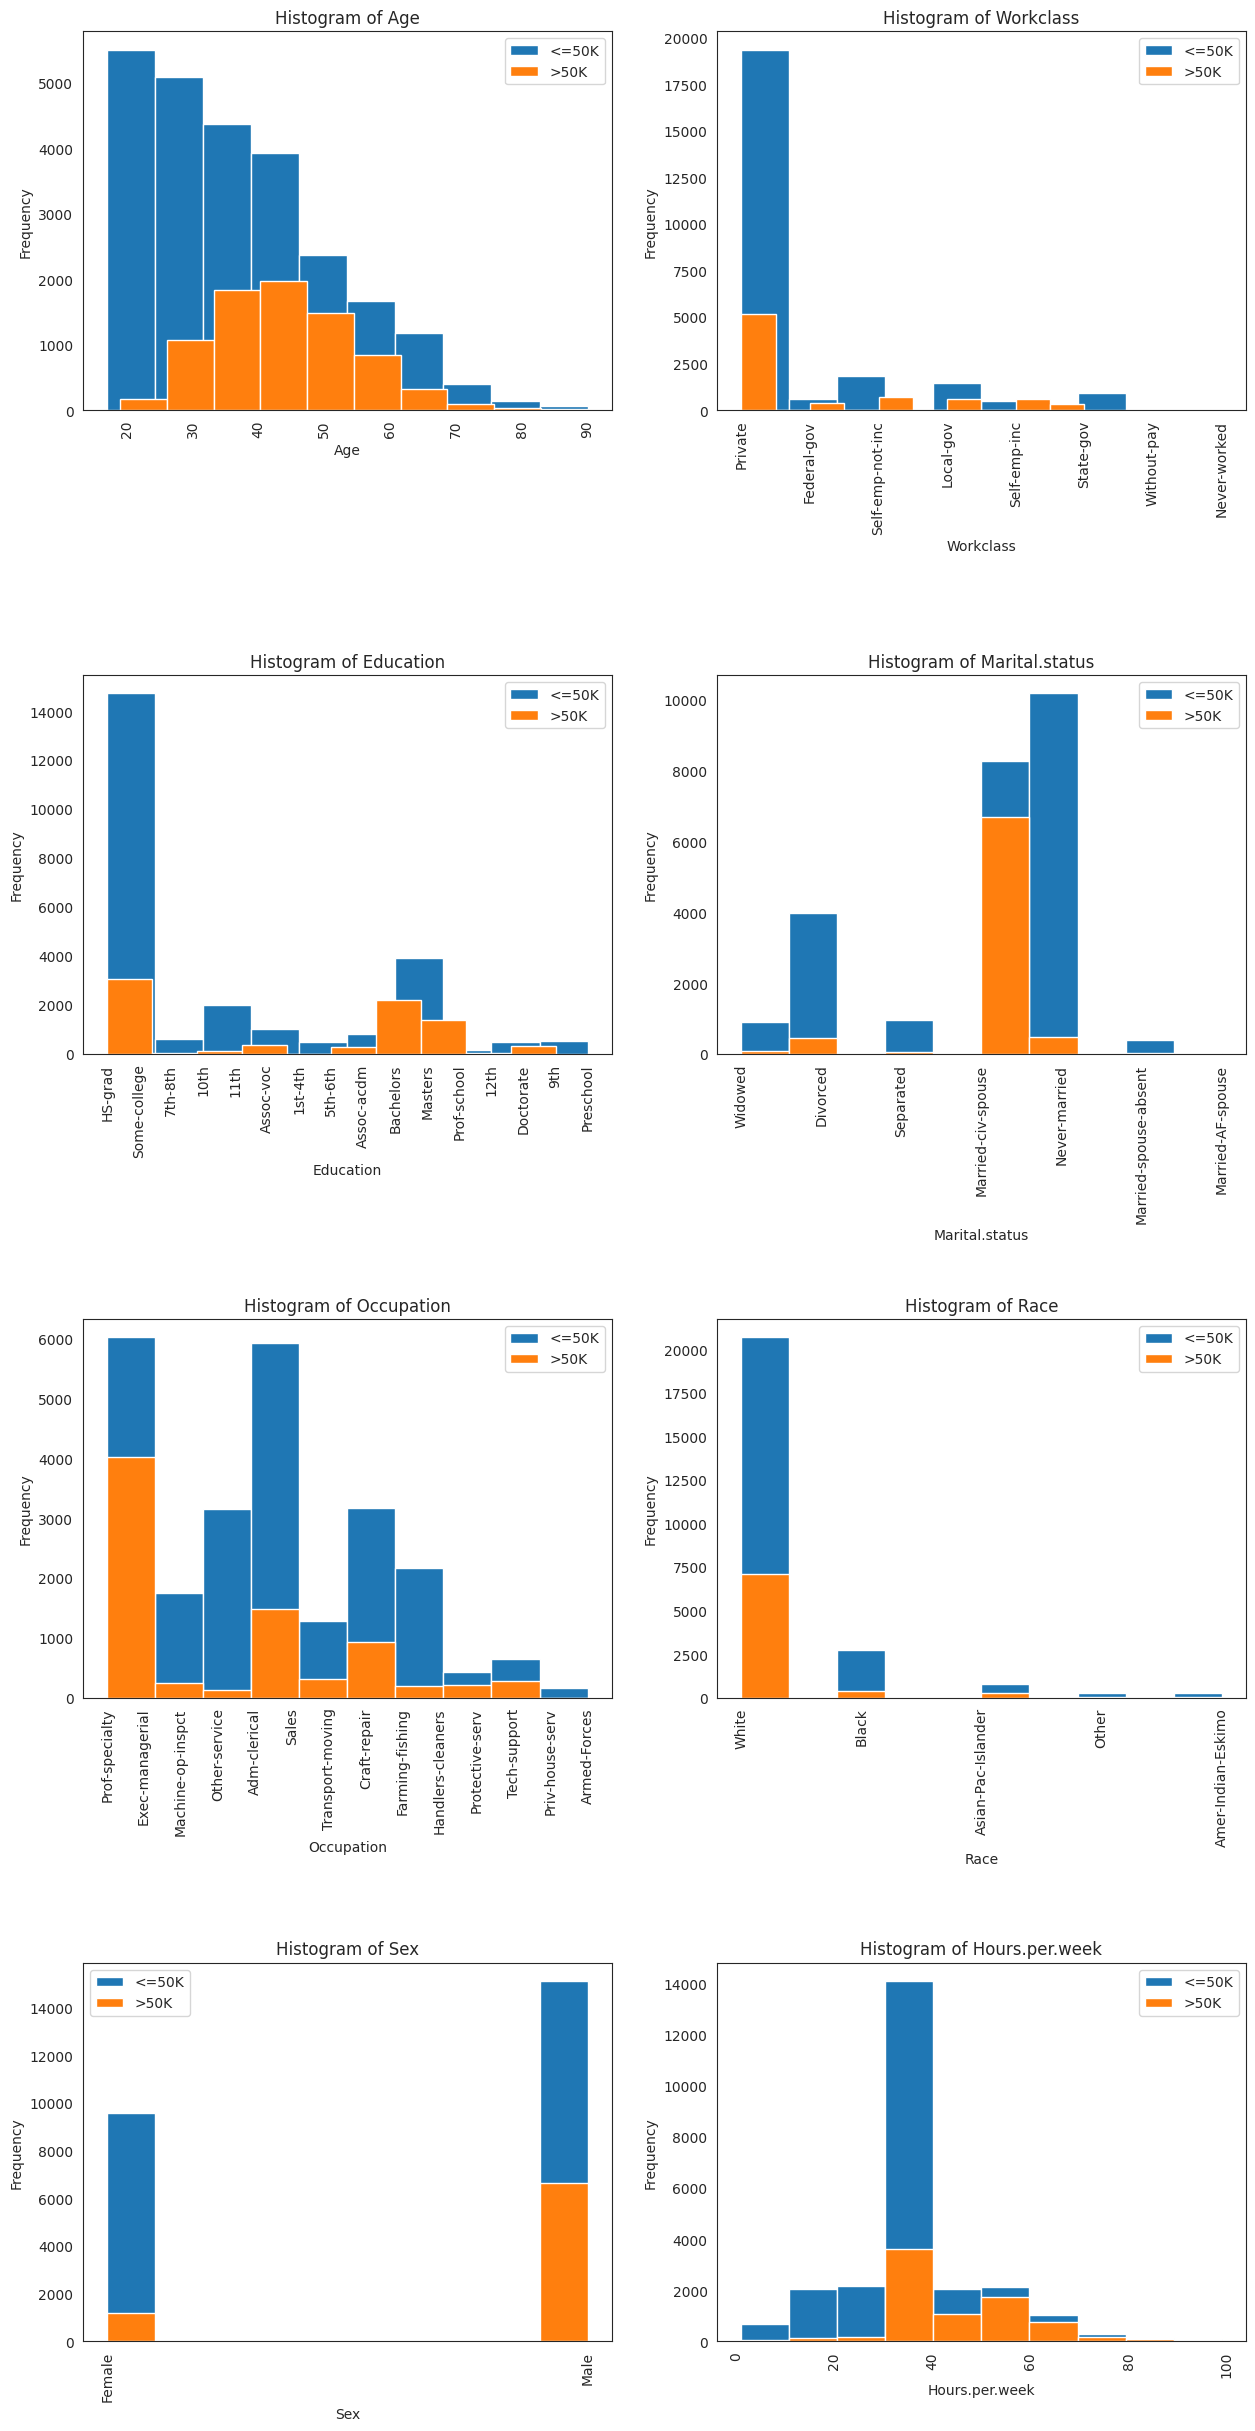

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each column
columns = ["age", "workclass", "education", "marital.status", "occupation", "race", "sex", "hours.per.week"]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 30))
axs = axs.flatten()

# Iterate over each column and create a histogram subplot grouped by income
for i, col in enumerate(columns):
    ax = axs[i]
    ax.hist(cleaned_df[cleaned_df['income'] == '<=50K'][col], bins=10, stacked=True, label='<=50K')
    ax.hist(cleaned_df[cleaned_df['income'] == '>50K'][col], bins=10, stacked=True, label='>50K')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {col.capitalize()}')
    ax.legend()

    # Rotate y-axis label
    plt.setp(ax.get_xticklabels(), rotation=90)

# Hide any unused subplots
for j in range(len(cleaned_df.columns), len(axs)):
    axs[j].set_visible(False)

# Adjust the spacing between subplots and save the figure

plt.subplots_adjust(hspace=0.7)
plt.show()

# Summary
Educated, married, white, older males have a higher probability of earning above 50K income